In [9]:
from qiskit import QuantumCircuit 
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from math import sqrt, pi

In [10]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
circ = QuantumCircuit(qr, crz, crx)
initial_state = [1/sqrt(2),1/sqrt(2)]
circ.initialize(initial_state,0)
circ.h(1)
circ.cx(1,2)
circ.barrier()
circ.cx(0,1)
circ.h(0)
circ.barrier()
circ.measure(0,0)
circ.measure(1,1)
circ.x(2).c_if(crz,1)
circ.z(2).c_if(crx,1)
circ.draw()

┌─────────────────────────────┐      ░      ┌───┐ ░ ┌─┐                 
  q_0: ┤ initialize(0.70711,0.70711) ├──────░───■──┤ H ├─░─┤M├─────────────────
       └────────────┬───┬────────────┘      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
  q_1: ─────────────┤ H ├───────────────■───░─┤ X ├──────░──╫─┤M├──────────────
                    └───┘             ┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
  q_2: ───────────────────────────────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                                      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ 
                                                            ║  ║ ┌──┴──┐   │   
crz: 1/═════════════════════════════════════════════════════╩══╬═╡ = 1 ╞═══╪═══
                                                            0  ║ └─────┘┌──┴──┐
crx: 1/════════════════════════════════════════════════════════╩════════╡ = 1 ╞
                                                               0        └─────┘

In [11]:
from qiskit import Aer
from qiskit import assemble
from qiskit.visualization import plot_histogram

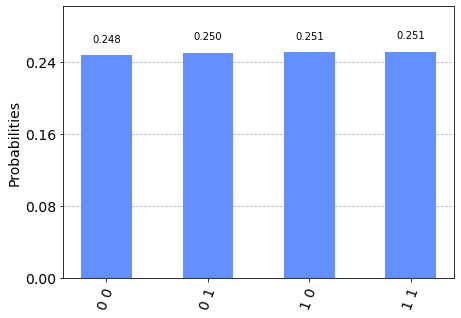

In [12]:
symulator = Aer.get_backend('qasm_simulator')
assembled = assemble(circ, shots = 100000)
run_result = symulator.run(assembled)
hist = run_result.result().get_counts()
plot_histogram(hist)

In [13]:
from qiskit import Aer
from qiskit import assemble

In [14]:
ass = assemble(circ)
symulator = Aer.get_backend('statevector_simulator')

In [15]:
wynik = symulator.run(ass)
ket = wynik.result().get_statevector()
print(ket)

[ 0.        +0.00000000e+00j -0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.70710678+0.00000000e+00j
 -0.        +0.00000000e+00j -0.        +0.00000000e+00j
 -0.        +0.00000000e+00j  0.70710678-8.65956056e-17j]
